<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Fundamentos de programación**


El presente curso hace parte de la especialización de analítica y ciencia de datos de la facultad de Ingeniería de la Universidad de Antioquia.

## **Sesión 12**

## **Contenido**

- <a href="#reg"> Clasificación: Regresión logística</a><br>
- <a href="#ent"> Entrenamiento</a><br>
- <a href="#fro"> Fronteras de decisión</a><br>
- <a href="#cla"> Regresión logística multinomial (Softmax)</a><br>





# **Clasificación**

Identificamos un problema de clasificación cuando las variables independientes son de naturaleza continua y la variable dependiente es categórica, es decir, en clases como clase positiva y clase negativa. A veces nos encontramos con más de 2 clases y aún así es un problema de clasificación. Este tipo de problemas se conocen como problemas de clasificación de múltiples clases o multinomial.



<p><a name="reg"></a></p>

# **Regresión logística**

En la regresión lineal, la salida es la suma ponderada de las entradas.


![picture](https://miro.medium.com/max/1092/1*8q9ztX9dGVCv7e0DmH_IVA.png)

La regresión logística es una regresión lineal generalizada en el sentido de que no generamos la suma ponderada de entradas directamente, sino que la pasamos a través de una función (función logística) que puede asignar cualquier valor real entre 0 y 1, que podemos utilizar para estimar la probabilidad de que una instancia pertenezca a una clase particular.

$$\hat p = h_w(X) = \sigma(W^T \cdot X)$$

Si la probabilidad estimada es mayor al 50 %, entonces el modelo predice que la instancia pertenece a la *clase positiva*. Si dicha probabilidad es menor al 50 %, el modelo predecirá que pertenece a la *clase negativa*.

\begin{equation}
\hat y =
\begin{cases}
 0 & si & \hat p < 0.5 \\
 1 & si & \hat p \geq 0.5\\
\end{cases}\end{equation}

Esto define un **clasificador binario**.

**Función logística:**

\begin{equation}
\sigma (z) = \frac{1}{1 + \exp(-z)}
\end{equation}

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
def sigmoid(x, w0 = 1, w1 = 1):
    return 1/(1 + np.exp(-w0 - w1* x))

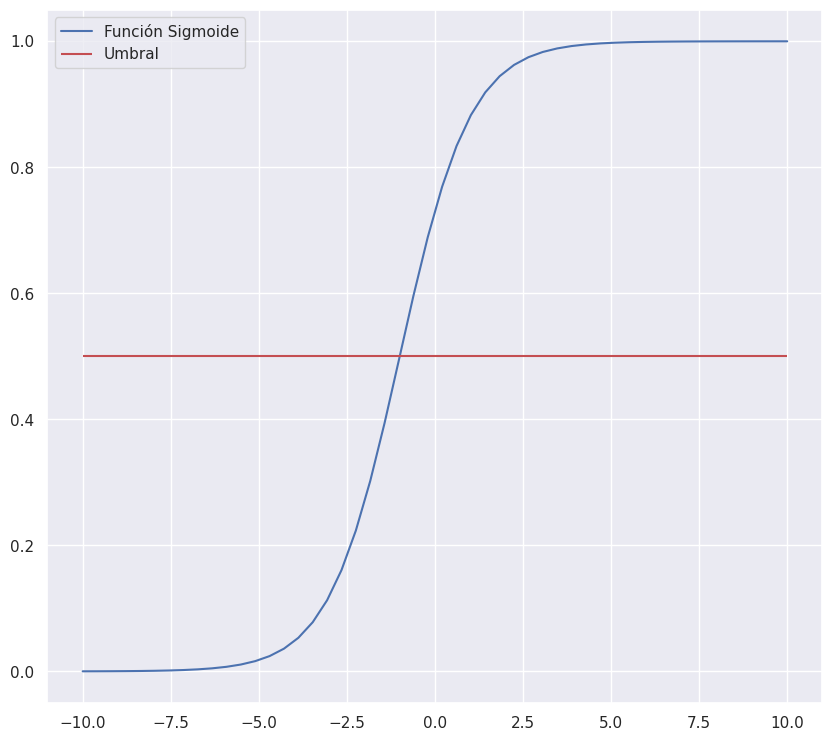

In [ ]:
x = np.linspace(-10, 10)
plt.figure(figsize = (10, 9))
plt.plot(x, sigmoid(x), label = 'Función Sigmoide')
plt.hlines(0.5, -10, 10, 'r',label = 'Umbral')
plt.legend();

<p><a name="ent"></a></p>

# **Entrenamiento**

El objetivo del entrenamiento es establecer el vector de parámetros $ W $ para que el modelo calcule altas probabilidades para instancias positivas ($y = 1$) y bajas probabilidades para instancias negativas ($y = 0$). Esta idea es capturada por la siguiente función de costo para una sola instancia

\begin{equation}
C(W) =
\begin{cases}
 -\log(h_w(X)) & si & y = 1\\
 -\log(1 - h_w(X) ) & si & y = 0\\
\end{cases}\end{equation}

![picture](https://miro.medium.com/max/974/1*yWzKLQhWITQ4bR2aMSVVuw.png)

De la figura vemos que el costo será grande si el modelo estima una probabilidad cercana a 0 para una instancia positiva, y será muy grande también cuando el modelo estime una probabilidad cercana a 1 para una instancia negativa.

La función de costo sobre todo el conjunto de entrenamiento es simplemente el costo promedio en todas las instancias de entrenamiento:

* **Log-loss**


\begin{equation}
J(W) = -\frac{1}{n} \sum_{i=1}^n [ y_i \log(h_w(x_i)) + (1 - y_i)\log(1 - h_w(x_i)) ]
\end{equation}

No existe una solución cerrada en este caso, análoga a la ec normal. Sin embargo, esta función de costo es convexa por lo que podemos utilizar el GD:

\begin{equation}
w_{j+1} = w_j - \eta \frac{\partial J(W)}{\partial w_j}
\end{equation}

donde

\begin{eqnarray}
\frac{\partial J(W)}{\partial w_j}  = \frac{1}{n} \sum_{i=0}^n \left[h_w(x^i) -y^i\right]x^i_{j}
\end{eqnarray}

<p><a name="fro"></a></p>

# **Fronteras de decisión**

Para ilustrar la regresión logística utilicemos el conjunto de datos Iris que habíamos trabajado antes. Este contiene información de longitud y ancho de 150 flores Iris de tres especies diferentes: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

![iris](https://i.imgur.com/kYu11vT.png)

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Para tener un problema de clasificación binaria, seleccionemos únicamente dos especies de flores y una sola característica *petal length*:

In [ ]:
X = iris.loc[iris.species != 'setosa',['petal_length']]
y = iris.loc[iris.species != 'setosa','species']
y.value_counts()

,count
species,
versicolor,50
virginica,50


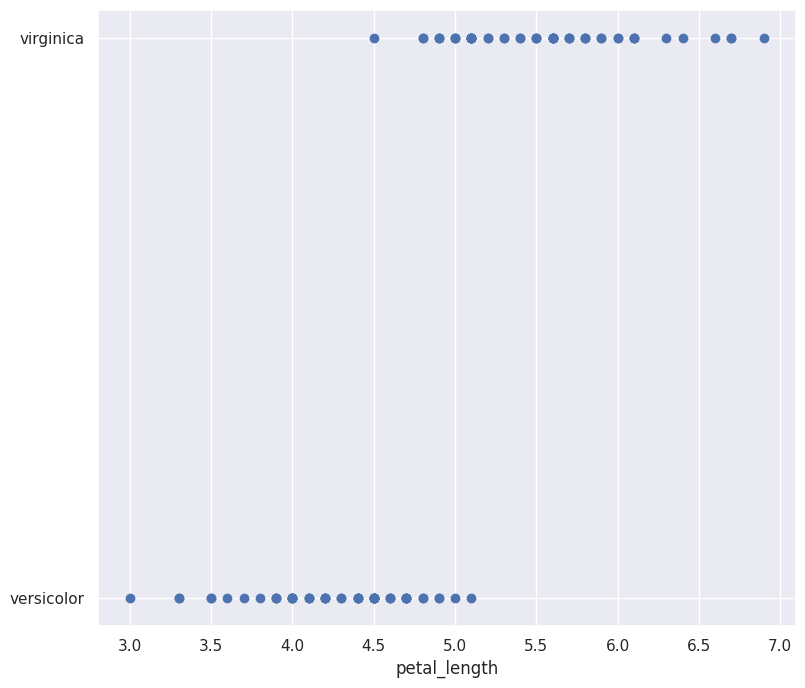

In [ ]:
plt.figure(figsize = (9, 8))
plt.scatter(X, y)
plt.xlabel('petal_length');

Construyamos el modelo:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

se podría construir un modelo como estos utilizando el GD, si hacemos `loss="log"`:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,petal_length
105,6.6
138,4.8
76,4.8
92,4.0
119,5.0
...,...
110,5.1
121,4.9
64,3.6
142,5.1


In [ ]:
lr_clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
sgd_clf = SGDClassifier().fit(X_train, y_train)

In [ ]:
lr_clf.score(X_test, y_test), sgd_clf.score(X_test, y_test)

(0.85, 0.85)

In [ ]:
lr_clf.decision_function(X_test)

array([ 0.79312661,  2.49972846,  2.84104884, -2.27875673, -2.27875673,
       -2.96139747,  0.11048587,  4.20633032, -4.66799933, -0.57215487,
       -1.25479562, -3.64403821,  0.11048587,  0.79312661,  2.49972846,
       -0.91347525, -0.2308345 ,  0.11048587, -2.96139747, -3.98535859])

In [ ]:
lr_clf.predict_proba(X_test)

array([[0.31149772, 0.68850228],
       [0.07587722, 0.92412278],
       [0.05514586, 0.94485414],
       [0.90710233, 0.09289767],
       [0.90710233, 0.09289767],
       [0.95079941, 0.04920059],
       [0.4724066 , 0.5275934 ],
       [0.01468217, 0.98531783],
       [0.99069633, 0.00930367],
       [0.63926025, 0.36073975],
       [0.7781289 , 0.2218711 ],
       [0.97451968, 0.02548032],
       [0.4724066 , 0.5275934 ],
       [0.31149772, 0.68850228],
       [0.07587722, 0.92412278],
       [0.71371078, 0.28628922],
       [0.55745374, 0.44254626],
       [0.4724066 , 0.5275934 ],
       [0.95079941, 0.04920059],
       [0.98175335, 0.01824665]])

In [ ]:
lr_clf.predict(X_test)

array(['virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

Grafiquemos las predicciones del modelo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


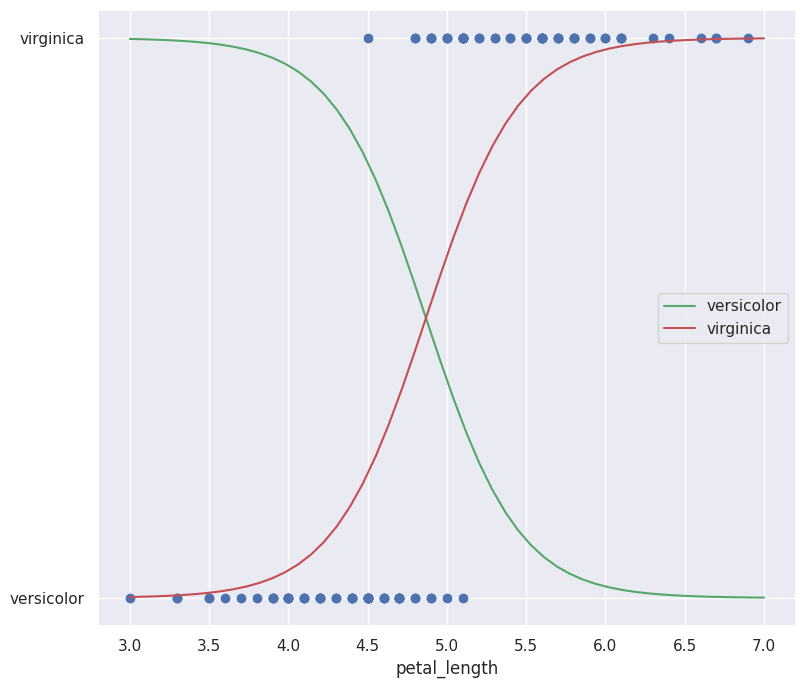

In [ ]:
x = np.c_[np.linspace(3, 7)]
y_proba = lr_clf.predict_proba(x)

plt.figure(figsize = (9, 8))
plt.scatter(X, y)
plt.plot(x, y_proba[:, 0], 'g', label = 'versicolor')
plt.plot(x, y_proba[:, 1], 'r', label = 'virginica')
plt.xlabel('petal_length')
plt.legend();

Para modelos lineales de regresión, la salida $\hat y$, es una función lineal de las características $X$: una línea, un plano o un hiperplano.

Para modelos lineales de clasificación, es la *frontera de decisión* la que es una función lineal de las entradas. En otras palabras, un clasificador binario lineal es un clasificador que separa dos clases utilizando una línea, un plano o un hiperplano.

Podemos obtener la frontera de decisión a partir de la hipótesis de la regresión logística:

\begin{equation}
h_w(X)  = \sigma(W^T \cdot X) =
\begin{cases}
 >0.5 & si & W^T \cdot X \geq 0 \\
 <0.5 & si & W^T \cdot X<0\\
\end{cases}\end{equation}

En nuestro caso, la frontera de decisión está dada por: $$X_{fd} = -\frac{w_0}{w_1}$$




In [ ]:
w0 = lr_clf.intercept_
w1 = lr_clf.coef_

x_fd = -w0 / w1
x_fd

array([[4.86762986]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


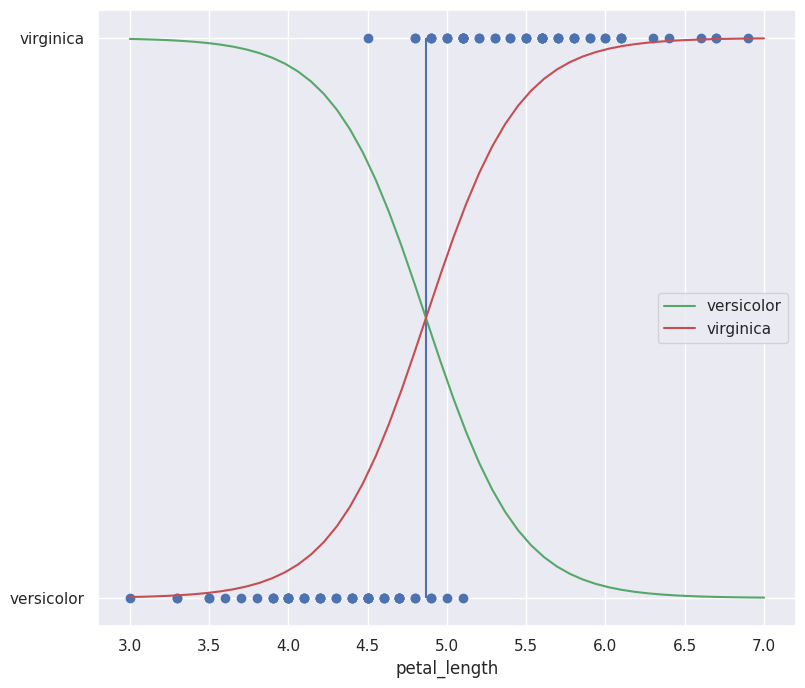

In [ ]:
x = np.c_[np.linspace(3, 7)]
y_proba = lr_clf.predict_proba(x)

plt.figure(figsize = (9, 8))
plt.scatter(X, y)
plt.vlines(x_fd, 0, 1)
plt.plot(x, y_proba[:, 0], 'g', label = 'versicolor')
plt.plot(x, y_proba[:, 1], 'r', label = 'virginica')
plt.xlabel('petal_length')
plt.legend();

Hay una frontera de decisión alrededor de 4.86 cm donde ambas probabilidades son iguales al 50 %. Si la longitud del pétalo es mayor a 4.86 cm, el clasificador predecirá que la flor es una Iris-virginica.

Consideremos ahora dos características para hacer la clasificación

In [ ]:
X = iris.loc[iris.species != 'setosa',['petal_length', 'petal_width']]
y = iris.loc[iris.species != 'setosa','species'].map({'versicolor': 0, 'virginica': 1})

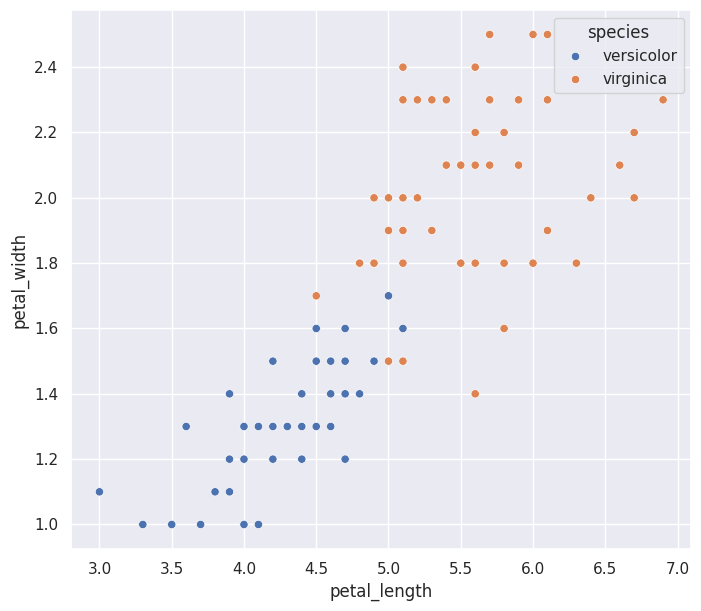

In [ ]:
plt.figure(figsize = (8,7))
sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue = iris.loc[iris.species != 'setosa','species']);

In [ ]:
def lr_clf(**kwargs):
    return make_pipeline(StandardScaler(),
                         LogisticRegression(**kwargs))

De nuevo, construyamos un modelo de clasificación, encadenando ahora la construcción del modelo con la estandarización de los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,petal_length,petal_width
105,6.6,2.1
138,4.8,1.8
76,4.8,1.4
92,4.0,1.2
119,5.0,1.5
...,...,...
110,5.1,2.0
121,4.9,2.0
64,3.6,1.3
142,5.1,1.9


In [ ]:
model = lr_clf().fit(X_train, y_train)

Tenemos que $$\omega_0+\omega_1x_1+\omega_2x_2 = 0$$.

En este caso la frontera de decisión estará dada por $$x_1 = -\frac{1}{w_1}\left( w_0 + w_2x_2\right) $$

Podemos utilizar la librería `mlxtend` para obtener directamente la frontera de decisión:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


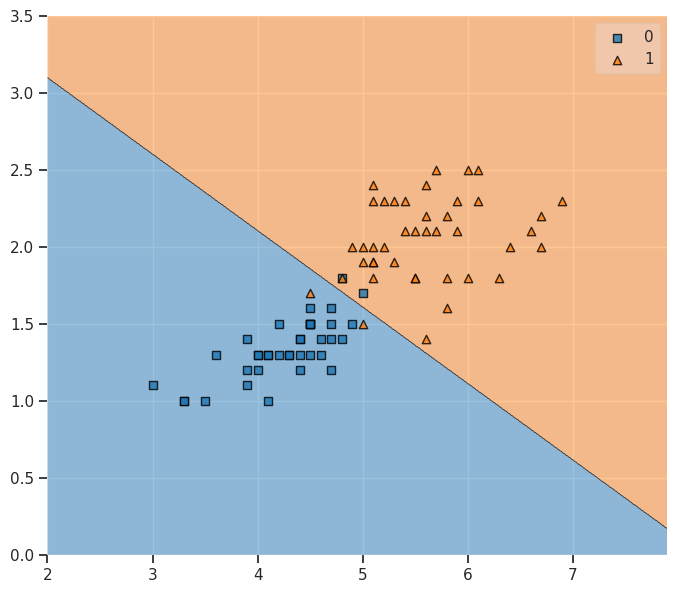

In [ ]:
import mlxtend.plotting as mlx

plt.figure(figsize = (8, 7))
mlx.plot_decision_regions(X_train.values, y_train.values, clf=model);

La regresión logística aplica por defecto una regularización L2. El modelo no utiliza $\alpha$ directamente sino que utiliza el parámetro $C$ que es el inverso de $\alpha$: $$C= \frac{1}{\alpha}$$ Veamos cómo depende la frontera de decisión en función de este parámetro:

In [ ]:
def CF(C):
    model = lr_clf(C = C).fit(X_train, y_train)
    plt.figure(figsize = (8, 7))
    mlx.plot_decision_regions(X_train.values, y_train.values, clf=model)
    plt.title(f"{C=} test score: {model.score(X_test, y_test)}");

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

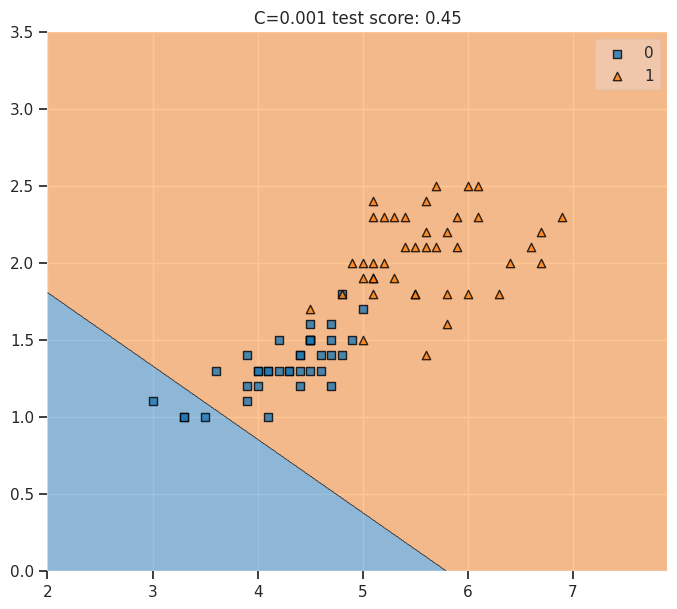

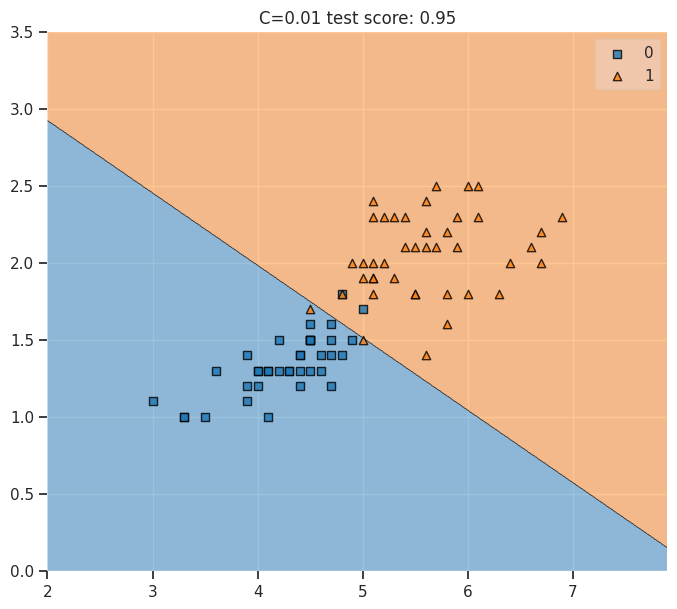

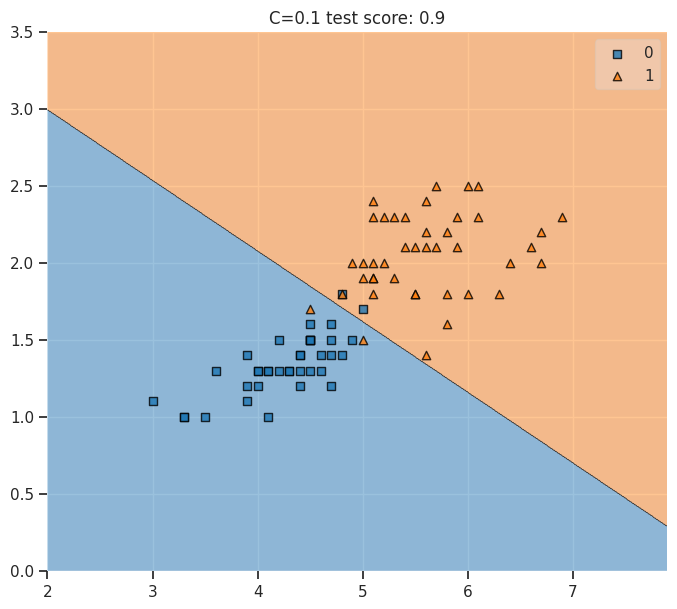

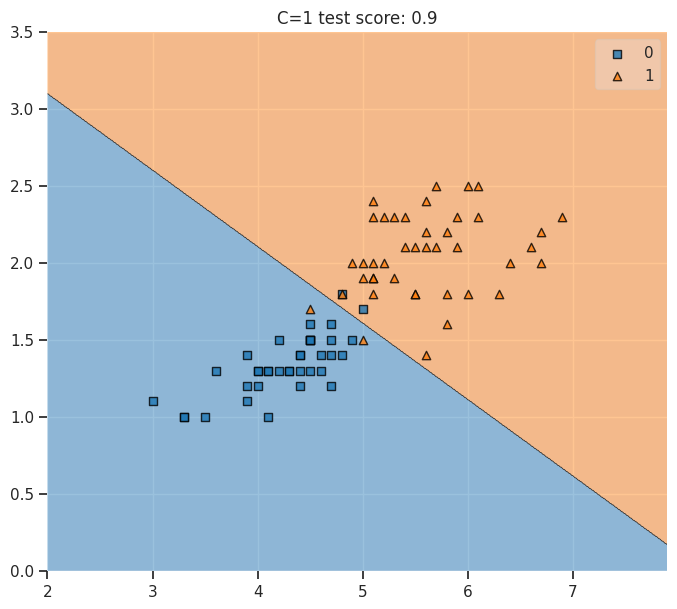

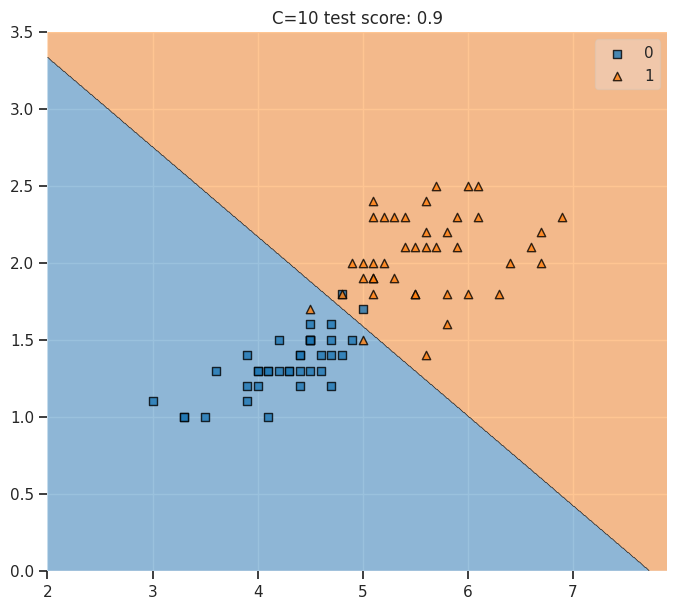

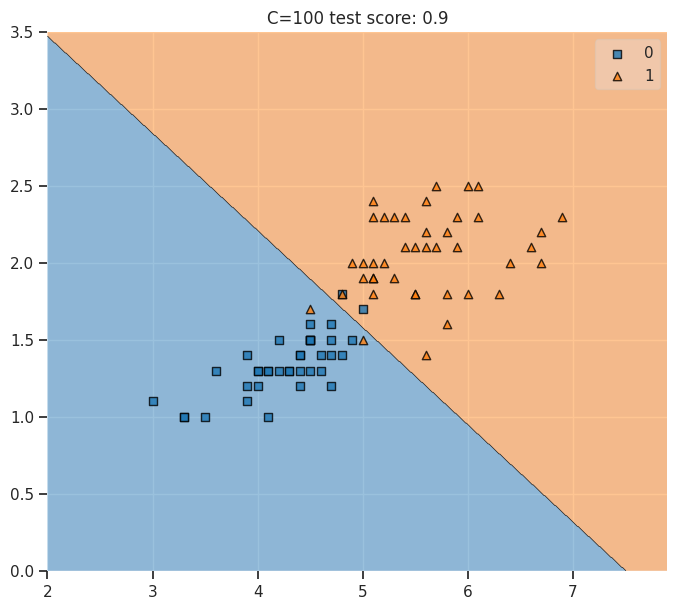

In [ ]:
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    CF(c)

Debemos tener en cuenta que este modelo no funciona muy bien para datos que no son separables linealmente, algo análogo a lo que pasaba con la regresión lineal cuando las características no tenían relaciones lineales.

<p><a name="cla"></a></p>

# **Regresión logística multinomial (Softmax)**

Mientras que los clasificadores binarios distinguen entre dos clases, los clasificadores multiclase (también llamados clasificadores multinomiales) pueden distinguir entre más de dos clases. Algunos algoritmos son capaces de manejar varias clases directamente. Otros son clasificadores estrictamente binarios. Sin embargo, existen varias estrategias que se pueden utilizar para realizar una clasificación multiclase utilizando varios clasificadores binarios:

 * OVA (one vs all)
 * OVO (one vs one)

El modelo de regresión logística se puede generalizar para admitir varias clases directamente, sin tener que entrenar y combinar varios clasificadores binarios. Este se conoce como Regresión logística multinomial o Regresión Softmax

La idea es simple: dada una instancia $x$, la regresión Softmax comienza calculando un puntaje $s_k(x)$ para cada clase $k$






$$s_k(X) = W_k^{T} \cdot X$$



Note que cada clase tiene su propio vector de parámetros $W_k$. Una vez se han calculado los puntajes de cada clase para la instancia $x$, se puede estimar la probabilidad $p_k$ de que la instancia pertenezca a la clase $k$ pasando el puntaje la *función softmax*:



\begin{eqnarray}
\sigma (s_k) = \frac{\exp(s_k(X))}{\sum_j^{k} \exp(s_k)}
\end{eqnarray}



Al igual que la regresión logística, la regresión Softmax predice la clase con la probabilidad estimada más grande, que es simplemente la clase con el puntaje más alto:



$$\hat y = \underset{k}{\text{argmax}} \: \: \sigma (s_k)$$




Ahora que sabemos cómo el modelo estima las probabilidades y hace las predicciones, veámos cómo es el entrenamiento: El objetivo es tener un modelo que estime una alta probabilidad para la clase objetivo (y consecuentemente una baja probabilidad para las otras clases). La siguiente función de costo, conocida como la *entropia cruzada*, logrará dicho objetivo dado que penaliza el modelo cuando este estima una baja probabilidad para la clase objetivo




\begin{eqnarray}
J(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_k^{i} \log(h_k^i)
\end{eqnarray}

Note que cuando solo hay dos clases (k=2), esta función de costo es equivalente a la función de costo de la regresión logistica, la *log-loss*.

Construyamos el modelo de clasificación multinomial:


In [ ]:
X = iris.loc[:,['petal_length', 'petal_width']]
y = iris.loc[:,'species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

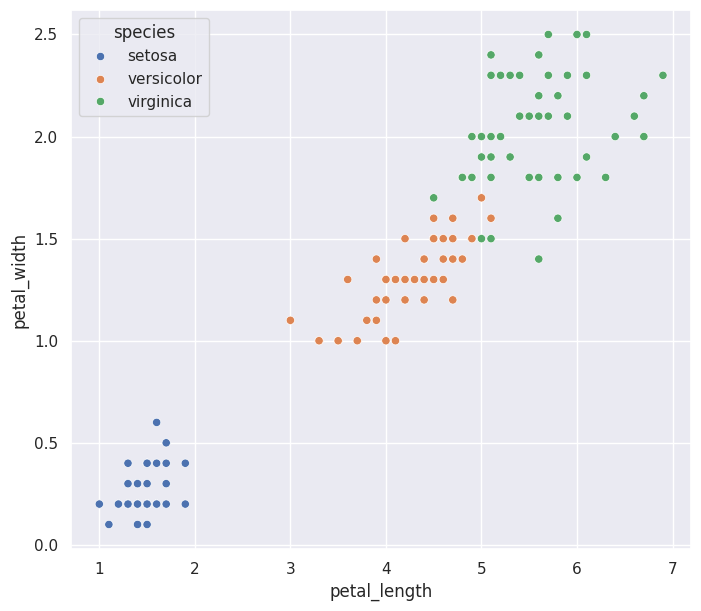

In [ ]:
plt.figure(figsize = (8,7))
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = make_pipeline(StandardScaler(),
                      LogisticRegression(multi_class = 'multinomial')).fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
model.predict_proba(X_test)

array([[1.71387619e-02, 8.61734925e-01, 1.21126314e-01],
       [9.29855929e-01, 7.01369200e-02, 7.15130983e-06],
       [3.82183434e-07, 6.47537562e-03, 9.93524242e-01],
       [9.53998998e-03, 7.35194273e-01, 2.55265737e-01],
       [7.87237435e-03, 7.38085148e-01, 2.54042477e-01],
       [9.33111088e-01, 6.68811132e-02, 7.79851797e-06],
       [6.83712578e-02, 8.85596905e-01, 4.60318368e-02],
       [4.71171373e-05, 5.86719218e-02, 9.41280961e-01],
       [9.53998998e-03, 7.35194273e-01, 2.55265737e-01],
       [5.69143538e-02, 8.96872819e-01, 4.62128271e-02],
       [2.71671821e-04, 1.65144747e-01, 8.34583581e-01],
       [9.70622314e-01, 2.93767345e-02, 9.51807390e-07],
       [9.67819655e-01, 3.21789931e-02, 1.35165802e-06],
       [9.66192090e-01, 3.38066684e-02, 1.24172970e-06],
       [9.46574455e-01, 5.34213067e-02, 4.23833352e-06],
       [4.59572081e-03, 6.01159270e-01, 3.94245010e-01],
       [1.35522643e-05, 3.66735042e-02, 9.63312944e-01],
       [7.22390774e-02, 8.96335

In [ ]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


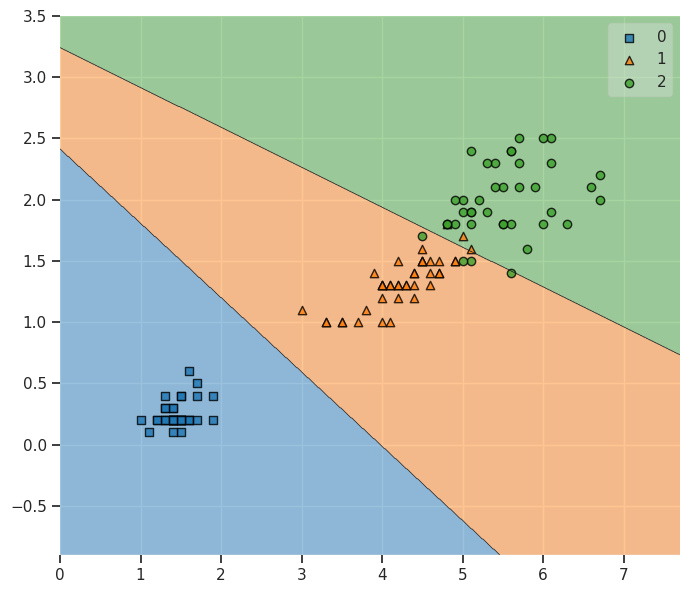

In [ ]:
plt.figure(figsize = (8, 7))
mlx.plot_decision_regions(X_train.values, y_train.values, clf=model);